# COMP90086 Workshop 4

In this workshop, you will have some practice of color manipulation and image formation concepts. Then we'll implement a multilayer perceptron (MLP) and convolutional neural network (CNN) in Keras—a high-level API for deep learning. We will use MNIST Dataset for experiments.

Table of Contents

- Color
    - Colour space transformations
    - Colour manipulations

- Exercise: Image formation and edges

- Convolutional neural networks
    - MNIST dataset
    - Multilayer Perceptron
    - Convolutional neural network with standard 2D convolution

# Color

## (1) Colour space transformations

### <center>RGB(red/green/blue) vs. HSV(Hue/Saturation/Value)</center>

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/RGB_color_solid_cube.png/1920px-RGB_color_solid_cube.png" width=300 height=300>

(Image Source: Wikipedia)

<img style="float: ;" src="https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/opencv_color_spaces_rgb_additive.png?lossy=1&strip=1&webp=1" width=300 height=300>

(Image Source: These images appears in many places, including [here](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/opencv_color_spaces_rgb_additive.png?lossy=1&strip=1&webp=1))

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/3/33/HSV_color_solid_cylinder_saturation_gray.png" width=300 height=300>

(Image Source: Wikipedia)


### <center>RGB(device-dependent) vs. XYZ (device-independent)</center>

<center>The CIE XYZ standard observer color matching functions </center>

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/8/8f/CIE_1931_XYZ_Color_Matching_Functions.svg" width=300 height=300>

(Image Source: Wikipedia)

### <center>Lab</center>

L*: The lightness value, defines black at 0 (down) and white at 100 (up), with neutral grays at the center of the axis.

The a* axis represents the green–red opponent, with negative values toward green and positive values toward red.

The b* axis represents the blue–yellow opponents, with negative numbers toward blue and positive toward yellow.

In theory there are no maximum values of a* and b*, but in practice they are usually numbered from -128 to +127 (256 levels).

<img style="float: ;" src="https://www.mdpi.com/diagnostics/diagnostics-13-00467/article_deploy/html/images/diagnostics-13-00467-g003.png" width=300 height=300>

(Image Source: These images appears in many places, including [here](https://www.mdpi.com/diagnostics/diagnostics-13-00467/article_deploy/html/images/diagnostics-13-00467-g003.png))

[Color conversions Explanation](https://docs.opencv.org/4.6.0/de/d25/imgproc_color_conversions.html)

In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

[cv2.IMREAD_UNCHANGED](https://docs.opencv.org/4.6.0/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80aeddd67043ed0df14f9d9a4e66d2b0708): It is used to read the image as it is. It does not make any changes or ignore anything from the image. You can also specify -1 for this flag.

[cv2.cvtColor( )](https://docs.opencv.org/4.6.0/d8/d01/group__imgproc__color__conversions.html)

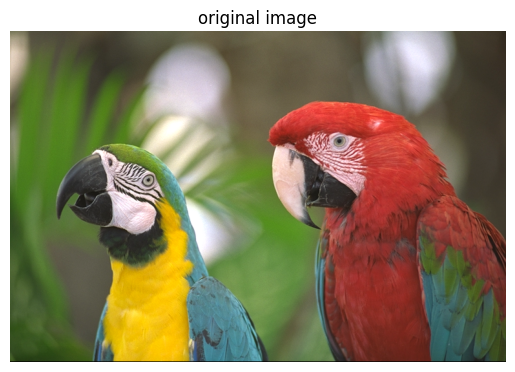

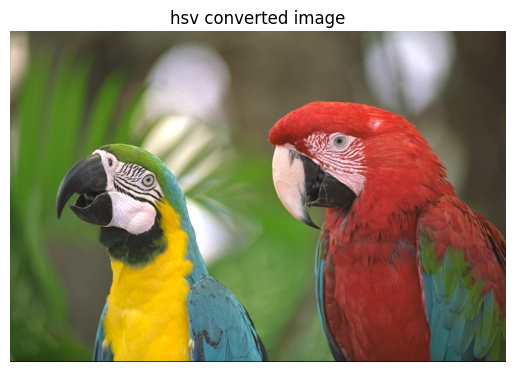

In [3]:
rootpath='./'
img = cv2.imread(os.path.join(rootpath, "kodim23.png"),cv2.IMREAD_UNCHANGED ) #BGR

#rearrange the channel for showing image
img1 = np.zeros(img.shape,np.uint8)
img1[:,:,0] = img[:,:,2] #red
img1[:,:,1] = img[:,:,1] #green
img1[:,:,2] = img[:,:,0] #blue

plt.imshow(img1)
plt.title('original image')
plt.axis('off')
plt.show()


img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_cvt = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

#rearrange the channel for showing image
img2 = np.zeros(img_cvt.shape,np.uint8)
img2[:,:,0] = img_cvt[:,:,2] #red
img2[:,:,1] = img_cvt[:,:,1] #green
img2[:,:,2] = img_cvt[:,:,0] #blue

plt.imshow(img2)
plt.title('hsv converted image')
plt.axis('off')

plt.show()


### Exercise 1

- Transform RGB to XYZ color space and show each channel.
- Transform XYZ back to RGB, and show the final image .

In [ ]:
#your code

- Transform RGB to LAB colorspace and show each channel.
- Transform LAB back to RGB, and show the final image.

In [ ]:
#your code

## (2) Colour manipulation

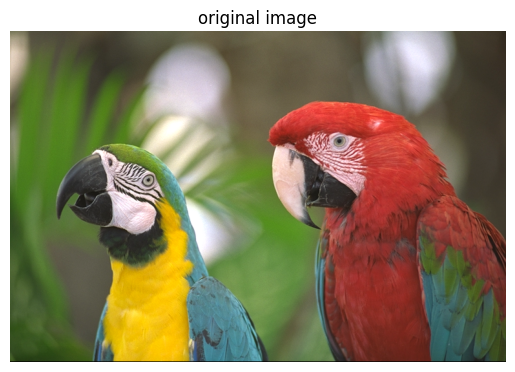

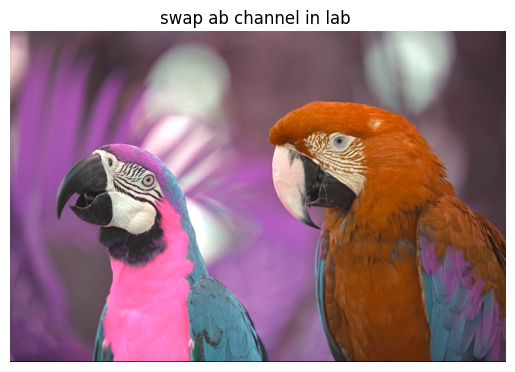

In [4]:
rootpath = './'
img = cv2.imread(os.path.join(rootpath, "kodim23.png"),cv2.IMREAD_UNCHANGED ) #BGR

#rearrange the channel for showing image
img1 = np.zeros(img.shape,np.uint8)
img1[:,:,0] = img[:,:,2] #red
img1[:,:,1] = img[:,:,1] #green
img1[:,:,2] = img[:,:,0] #blue

img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

#swap a b channel for showing difference
img_lab2 = np.zeros(img_lab.shape,np.uint8)
img_lab2[:,:,0] = img_lab[:,:,0]
img_lab2[:,:,1] = img_lab[:,:,2]
img_lab2[:,:,2] = img_lab[:,:,1]

img_cvt = cv2.cvtColor(img_lab2, cv2.COLOR_Lab2BGR)

#rearrange the channel for showing image
img2 = np.zeros(img_cvt.shape,np.uint8)
img2[:,:,0] = img_cvt[:,:,2] #red
img2[:,:,1] = img_cvt[:,:,1] #green
img2[:,:,2] = img_cvt[:,:,0] #blue



plt.imshow(img1)
plt.title('original image')
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.title('swap ab channel in lab ')
plt.axis('off')

plt.show()


### Exercise 2
- Transform to LAB, invert the `a` axis, then back transform to RGB. Show the result.

In [ ]:
#your code
rootpath = './'
img = cv2.imread(os.path.join(rootpath, "kodim23.png"),cv2.IMREAD_UNCHANGED ) #BGR

img_lab3 = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

img_lab3[:,:,1] = 255 - img_lab3[:,:,1]


### Exercise 5

Assume that all surfaces in the image below are Lambertian (diffuse reflectance) surfaces, and the scene is lit by a single light source.

i) What are the scene/object parameters that determine the R,G,B value of each pixel in this scene?

ii) At the region indicated by the circle and arrow, which of the parameters you listed in (i) are changing and which are constant?

### Image 1
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/img1.png" width=400 height=400>

### Image 2
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/img2.png" width=400 height=400>

### Image 3
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/img3.png" width=400 height=400>

# Object recognition with neural networks

The following exercises will use tensorflow:

In [5]:
# Imports
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.19.0


## 1. MNIST dataset

MNIST is a dataset that consists of images of handwritten digits:
* the input data are images of handwritten digits (28×28 pixels with a single 8-bit channel)
* the target is a label in the set $\{0, 1, \ldots, 9\}$

The data is already split into training and test sets. The training set contains 60,000 instances and the test set contains 10,000 instances.

<center>Sample images from MNIST test dataset. (MNIST refers to *Modified National Institute of Standards and Technology*.)</center>

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width=500 height=500>

(Ref & Image Source: Wikipedia [MNIST database](https://en.wikipedia.org/wiki/MNIST_database))

Below we load the data into NumPy arrays using a built-in function from Keras.

Keras is an open-source deep learning library written in Python.

In [6]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print("train_images shape:", train_images.shape)
print("test_images shape:", test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train_images shape: (60000, 28, 28)
test_images shape: (10000, 28, 28)


Before using the data for classification, we need to do some basic pre-processing:
 * rescale the images so that each pixel is represented as a float between 0 and 1
 * tranform the input to be a 4D input with number of samples + (rows, cols, channels), so that it can be fed to a layer in keras.

In [7]:
# Data type adjustment & rescale
train_images = train_images.astype(float) / 255 #scale the pixel values to be 0-1
test_images = test_images.astype(float) / 255

### <center>Small detour: One reason for why to normalize data inputs</center>
<img style="float: ;" src="https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2018-01-23-at-2.27.20-PM.png" width=700 height=700>

(Image Source: JEREMY JORDAN, [Normalizing your data](https://www.jeremyjordan.me/batch-normalization/))

### Exercise 1

tranform the input to be a 4D input with number of samples + (rows, cols, channels)

***hint: use [ny.expand_dims](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html)***

In [ ]:
#transform training data
#your code


#transform testing data
#your code



print("train_images shape:", train_images.shape)
print("test_images shape:", test_images.shape)

The code block below visualises random examples from the training set.

In [ ]:
num_images = 10
fig, axes = plt.subplots(figsize=(1.5*num_images, 1.5), ncols=num_images)

# replace: Whether the sample is with or without replacement.
# Default is True, meaning that a value of a can be selected multiple times.
sample_ids = np.random.choice(train_images.shape[0], size=num_images, replace=False)

for i, s in enumerate(sample_ids):
    axes[i].imshow(train_images[s,:,:,0], cmap='binary')
    axes[i].set_title("$y = {}$".format(train_labels[s]))
    axes[i].axis('off')
plt.show()

### <center>Small detour: Choosing Colormaps in Matplotlib</center>

<img style="float: ;" src="https://matplotlib.org/3.4.3/_images/sphx_glr_colormaps_003.png" width=500 height=500>

(Image Source: [Choosing Colormaps in Matplotlib](https://matplotlib.org/devdocs/tutorials/colors/colormaps.html))

Finally, we note that the training set is relatively balanced—there are roughly 6000 examples for each digit.

In [ ]:
plt.hist(train_labels, bins=range(11), align='left')
plt.xticks(ticks=range(11))
plt.title('Distribution of classes in training data')
plt.ylabel('Frequency')
plt.xlabel('Digit')
plt.show()

## 2. Multilayer perceptron

The handwritten digit recognition task is an example of a _multi-class_ classification problem.
There are 10 classes—one for each digit $0, 1,\ldots, 9$.

We need to define 10 output units in the output layer and apply a softmax activation function to generate probability distribution of the classes


This MLP model can be expressed in Keras as follows.

In [ ]:
# Create the MLP model
mlp = keras.Sequential(
    [
        layers.Input((28,28,1)),               # Tell Keras the shape of the input array (a single-channel 28×28 image)
        layers.Flatten(),                      # Unravel/flatten the input array
        layers.Dense(16, activation='relu'),   # Add a fully-connected layer with 16 units and ReLU activation function as the hidden layer
        layers.Dense(10, activation='softmax') # Add a fully-connected layer with a softmax activation function
    ]
)


### <center>Small detour: Softmax & ReLU</center>
<img style="float: left ;" src="https://pic3.zhimg.com/80/v2-998ddf16795db98b980443db952731c2_1440w.jpg?source=1940ef5c" width=400 height=400>

(Image Source: These images appears in many places, including [here](https://www.programmersought.com/article/58194026613/))


<img style="float: right;" src="https://miro.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png" width=300 height=300>

(Image Source: [ReLU](https://miro.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png))

Next, we have to specify a loss function. We use categorial [cross_entropy](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class) for this task. We use [Adam](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam) (Adaptive Moment Estimation) as the optimisation algorithm to update weights of the network and directs Keras to keep track of accuracy during training.

In [ ]:
# Configure the model
mlp.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #use SparseCategoricalCrossentropy because labels are integers. If the labels are one-hot representation, please use CategoricalCrossentropy loss.
           metrics=['accuracy'])

We're now ready to fit the `mlp` model using the training data.
By setting `batch_size = 100`, each gradient descent step is computed w.r.t. a random batch of 100 training instances.
By setting `epochs = 20`, we loop over the complete training data 20 times.

In [ ]:
# Start training
history_mlp = mlp.fit(train_images, train_labels, epochs=20, batch_size=100,
                      validation_split=0.2)

The plots below show that the model fit is unlikely to improve significantly with further training.
Both the test loss and accuracy have flattened out.

In [ ]:
plt.plot(history_mlp.history['accuracy'], label='Train')
plt.plot(history_mlp.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_mlp.history['loss'], label='Train')
plt.plot(history_mlp.history['val_loss'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.title('Training and validating loss')
plt.legend()
plt.show()

However, all of these observations were based on validation data. The best way to test it is to use the actual data generated earlier:

### Evaluate model performance

In [ ]:
# Test the model after training
test_results = mlp.evaluate(test_images, test_labels)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Similar result? That's great :)
### Make a prediction

***Hint: Try refreshing several times to see different test examples***

In [ ]:
sample_id = np.random.choice(test_images.shape[0])
digit = test_images[sample_id]

plt.imshow(digit.squeeze(), cmap="binary")
plt.title("$label = {}$".format(test_labels[sample_id]))
plt.axis('off')
plt.show()

# expand dimensions so that it represents a single 'sample'
digit = np.expand_dims(digit, axis=0)

# make a prediction for the test sample
predict_digit = mlp.predict(digit)

for index, i in enumerate(predict_digit[0]):
    print ("probability for the test sample is", index, ":",i)

print("------")
# The predicted digit (with the highest probability value)
print("The predicted digit:",np.argmax(mlp.predict(digit, verbose=0)))

Notice that we use the Softmax activation function in the output layer, so `predict_digit` returns a 1D tensor with 10 elements, corresponding to the probability values of each category. The predicted digit has the highest probability value.

### Summary

We can get a useful summary, including output shape and number of parameters  of the model architecture using the `summary` method, as shown below.
* Try to  compute the parameters of each layer yourself. Note that if you donot count bias, there could be some difference compare with the summary output number (with bias in a layer, the additional NO. parameters is the NO. filters in the layer).

In [ ]:
mlp.summary()

## 3. Convolutional neural network with standard 2D convolution

Let's now construct a CNN with standard 2D convolution with the following structures for classification on the MNIST dataset.

| Number | Layer type    | Specification                                                                           | Keras function |
|--------|---------------|-----------------------------------------------------------------------------------------|----------------|
| 1      | Convolutional | 8 5×5 filters with a stride of 1 and a ReLU activation function                         | Conv2D         |
| 2      | Pooling       | Max pooling with a 2×2 filter and a stride of 2 (implies pooled regions do not overlap) | MaxPooling2D   |
| 3      | Convolutional | 16 5×5 filters with a stride of 1 and a ReLU activation function                        | Conv2D         |
| 4      | Pooling       | Same specs as pooling layer #1                                                          | MaxPooling2D   |
| 5      | Flatten       | Nil                                                                                     | Flatten        |        |
| 6      | Dense         | 10 units (one for each target class) with a softmax activation function.                | Dense          |



### Exercise 2

Complete the code block below to instantiate the model in Keras.

Hint: check keras documents for usages of the layers, e.g., how to set the hyperparameters.

*2D convolutional layer: [layers.Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)

*2D Maxpooling layer: [layers.MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/)


In [ ]:
cnn = keras.Sequential(
    [
        layers.Input((28, 28, 1)),

        #
        #your code
        #


        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ],
)

Compile and training the model as before

In [ ]:
cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

Training the `cnn` model takes longer than training the `mlp` model on a CPU.
You may like to set the number of epochs to a smaller number (e.g. `epochs=10`) if you don't have much time to spare.

In [ ]:
history_cnn = cnn.fit(train_images, train_labels, epochs=10, batch_size=100,
                      validation_split=0.2)

Let's plot the accuracy and loss for each epoch

In [ ]:
plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.title('Training and validating loss')
plt.legend()
plt.show()

We can get a useful summary, including output shape and number of parameters  of the model architecture using the `summary` method, as shown below.
* Try to  compute the parameters of each layer yourself. Note that if you donot count bias, there could be some difference compare with the summary output number (with bias in a layer, the additional NO. parameters is the NO. filters in the layer).

In [ ]:
cnn.summary()


***
**Question:** How does  `cnn` model compare with  the earlier `mlp` model in terms of number of parameters and testing accuracy ?
***
